# High Earners
- In this notebook I will produce a model which predicts whether someone is a high earner or not based on their census data.
 

In [104]:
# To begin we must first import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
plt.style.use('ggplot')

In [105]:
#then we must import the data into the notebook
census_df = pd.read_csv('./data/High Earner.csv')

In [106]:
#now lets see the data
census_df.head()

,age,employer type,educational level,marital status,job type,relationship status,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
0,56,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,No
1,46,Private,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,No
2,50,?,9,Married-civ-spouse,?,Husband,Black,Male,0,0,40,United-States,No
3,37,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,No
4,52,Self-emp-not-inc,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,Yes


In [107]:
#lets see the shape of the ds
census_df.shape

(32561, 13)

In [108]:
#what columns do we have?
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age                      32561 non-null int64
employer type            32561 non-null object
educational level        32561 non-null int64
marital status           32561 non-null object
job type                 32561 non-null object
relationship status      32561 non-null object
ethnicity                32561 non-null object
sex                      32561 non-null object
capital gains            32561 non-null int64
capital losses           32561 non-null int64
hours worked per week    32561 non-null int64
country of birth         32561 non-null object
high income?             32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


- So far we know there are 32,561 entries of data with 13 columns. 
- Looking at the head of the dataset we can see some values are '?', which means they are missing, so lets try to take care of them!

In [109]:
#find all the unique vals of age
census_df['age'].unique()

array([56, 46, 50, 37, 52, 25, 63, 27, 33, 45, 28, 30, 29, 48, 35, 34, 69,
       31, 53, 41, 44, 26, 23, 70, 20, 62, 38, 43, 42, 24, 39, 19, 47, 32,
       60, 22, 72, 18, 17, 59, 21, 58, 57, 68, 83, 61, 54, 49, 74, 36, 51,
       64, 66, 40, 75, 67, 65, 73, 78, 55, 80, 71, 90, 76, 79, 77, 81, 87,
       88, 84, 82, 85, 86])

- Looking at the age field there are no missing values so we need not worry abput age


In [110]:
#find all the unique vals of employer type
census_df['employer type'].unique()

array(['Private', '?', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov',
       'State-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

In [111]:
#How many missing vals are there
(census_df['employer type'] == '?').value_counts()

False    30725
True      1836
Name: employer type, dtype: int64

- Here we can see that there are 1836 missing values. Lets see if we can fix that - if not we will just have to remove these items

In [112]:
census_df.loc[census_df['employer type']=='?']

,age,employer type,educational level,marital status,job type,relationship status,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
2,50,?,9,Married-civ-spouse,?,Husband,Black,Male,0,0,40,United-States,No
35,70,?,13,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,40,China,No
86,21,?,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,No
94,68,?,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,No
144,20,?,9,Married-civ-spouse,?,Wife,White,Female,0,0,45,United-States,No
151,50,?,7,Married-civ-spouse,?,Own-child,Black,Female,0,0,40,United-States,No
187,49,?,9,Married-civ-spouse,?,Husband,White,Male,0,0,60,United-States,No
197,22,?,9,Divorced,?,Other-relative,Black,Female,0,0,40,United-States,No
200,69,?,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,No
204,68,?,16,Married-civ-spouse,?,Husband,White,Male,0,0,70,United-States,No


- As we can see, both values of Employer type and Job type seem to be both missing, lets double check to make sure. If this is the case, its pretty hard to infer what the employer type is if we do not know the job type

In [113]:
#Check to see if both emp type and job type are = to ?
emp = census_df['employer type']
job = census_df['job type']
#if so store a y in remove column
census_df['Remove'] = np.where (emp == job, 'Y', 'N')

In [114]:
#how many do we have to remove?
census_df['Remove'].value_counts()

N    30725
Y     1836
Name: Remove, dtype: int64

- We can see that there are 1,836 entries with missing data for the two columsn so we will remove them and the newly created column

In [115]:
#get rid of them
census_df = census_df[census_df.Remove != 'Y']

In [116]:
#check to see if sucessful
census_df['Remove'].value_counts()

N    30725
Name: Remove, dtype: int64

In [117]:
#get rid of column
census_df = census_df.drop(columns=['Remove'])

- Now lets see if there is any more missing data

In [118]:
census_df['educational level'].unique()

array([14, 11,  9, 10,  7, 13,  5, 12,  6, 15,  8,  4,  2, 16,  3,  1])

In [119]:
census_df['marital status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-AF-spouse',
       'Never-married', 'Separated', 'Married-spouse-absent', 'Widowed'],
      dtype=object)

In [120]:
census_df['job type'].unique()

array(['Exec-managerial', 'Adm-clerical', 'Craft-repair', 'Sales',
       'Machine-op-inspct', 'Prof-specialty', 'Other-service',
       'Tech-support', 'Transport-moving', 'Handlers-cleaners',
       'Protective-serv', 'Farming-fishing', 'Priv-house-serv', '?',
       'Armed-Forces'], dtype=object)

In [121]:
census_df.loc[census_df['job type']=='?']

,age,employer type,educational level,marital status,job type,relationship status,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
1054,18,Never-worked,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,No
2740,23,Never-worked,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,No
3192,17,Never-worked,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,No
8469,30,Never-worked,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,No
10969,18,Never-worked,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,No
11067,18,Never-worked,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,No
15652,20,Never-worked,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,No


- Here we can see 7 entries without a job type. We can see the employer is Never worked thus the job type is unemployed

In [122]:
census_df['job type'] = census_df['job type'].replace(['?'], 'Unemployed')

In [123]:
census_df['relationship status'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [124]:
census_df['ethnicity'].unique()

array(['White', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [125]:
census_df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [126]:
census_df['capital gains'].unique()

array([    0,  1848, 13550,  2829, 27828,  5455,  2907,  4787,  6849,
        2105, 15024,  5178,  2635, 99999, 41310,  7298,  5013,  6360,
        7688, 20051,  3273,  8614,  3137, 14344,  3464,  3818,  2050,
        2176,  2407,  4416,  4101,  1506,  6418,  5556,  4386,  4865,
        2580,  2597, 25236,  3471,  3103,  4508,  4064,  2036, 14084,
       10520,  1471,  2885,  6723,  2346,   914,  3411,  1151,  9386,
        2174,  3325,  7443,  2964,  3781,  3887,  3942, 25124,   114,
         594,  2062,  4931, 34095,  3674,  1055,  4650,  1424,  1831,
        3908,  6497,  2463,  2414,  7430, 22040,  2354,  4934,  1409,
        6767,  6514,  2977,  1797,  2961,   991,  2653,  1173, 15020,
        2936, 10566,  2290,  2009, 15831,  2228,  3418,  2202,  9562,
        2329,  7896, 18481, 10605,  5721,  7978,  4687,  3432,  3456,
        5060,  1639,   401,  6097,  2538,  2387,  1455, 11678,  1086,
        2993])

In [127]:
census_df['capital losses'].unique()

array([   0, 1977, 1902,  213, 1980, 1628, 1762, 2051, 1564, 2201, 2415,
       1672, 1741, 1887, 1740, 1092, 1590, 1602, 1669, 2377, 1848, 1485,
       2258, 2205, 1504, 2559, 1651, 2042, 2129, 3683, 2179, 1876, 1721,
       1380, 2246, 2444, 2174, 1719, 2231, 1594,  625, 1726, 1411, 1579,
       2002, 1825, 1668, 1408,  880, 1974, 2392, 2001, 2339, 2603,  810,
       1340, 1138, 2467, 3900, 3770,  323, 2547, 1573, 2206, 1648, 1617,
       2057, 2352, 1539, 1735, 3004, 2238, 2267, 2457,  653, 2754, 2824,
       1258, 2282, 4356, 1944,  419,  974,  155, 2149, 1755, 1844, 1816,
       2472, 2080])

In [128]:
census_df['hours worked per week'].unique()

array([40, 55, 50, 56, 20, 35, 24, 65, 45, 43, 36, 25, 10, 52, 60, 99,  5,
       17, 49, 30, 38, 44, 48, 15,  7, 16, 42,  2, 70, 47, 18, 37, 28, 90,
       12, 14, 62,  8, 84, 46, 80, 78, 34, 32, 22, 72,  9, 26, 33,  3, 68,
        4, 23,  6, 41, 75, 58, 39, 85, 64, 31, 66, 21, 19, 27, 54, 13, 91,
       76, 29, 67, 59, 77, 88, 53, 98, 51, 11, 63, 57, 95, 92, 96, 86, 82,
       81, 73,  1, 61, 94, 97, 87, 74, 89])

In [129]:
census_df['country of birth'].unique()

array(['United-States', '?', 'Jamaica', 'Poland', 'Puerto-Rico', 'Mexico',
       'France', 'Philippines', 'Greece', 'El-Salvador', 'India',
       'Portugal', 'Canada', 'Germany', 'Vietnam', 'England', 'Guatemala',
       'South', 'Cuba', 'Taiwan', 'Peru', 'Italy', 'Dominican-Republic',
       'Japan', 'China', 'Ecuador', 'Iran', 'Columbia', 'Haiti',
       'Ireland', 'Laos', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)',
       'Yugoslavia', 'Hungary', 'Honduras', 'Trinadad&Tobago', 'Scotland',
       'Cambodia', 'Thailand', 'Hong', 'Holand-Netherlands'], dtype=object)

 - Aha! - country of birth has missing values - let's see if we can fix this!

In [130]:
(census_df['country of birth'] == '?').value_counts()

False    30169
True       556
Name: country of birth, dtype: int64

In [131]:
census_df['country of birth'].mode()

0    United-States
dtype: object

In [132]:
(census_df['country of birth'] == ' United-States').value_counts()

False    30725
Name: country of birth, dtype: int64

In [133]:
census_df['country of birth'] = census_df['country of birth'].replace(['?'], 'United-States')

- Here we replaced the missing data with the most occuring value 

- Looking at the description of the data, the column relationship status refers to the relationship between the person and one other person in the census (details not included in the dataset) thus making this column redunant so we drop!

In [134]:
census_df = census_df.drop(columns=['relationship status'])

In [135]:
census_df

,age,employer type,educational level,marital status,job type,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
0,56,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,No
1,46,Private,11,Divorced,Adm-clerical,White,Female,0,0,40,United-States,No
3,37,Private,9,Married-civ-spouse,Craft-repair,White,Male,0,0,40,United-States,No
4,52,Self-emp-not-inc,10,Married-civ-spouse,Sales,White,Male,0,0,55,United-States,Yes
5,25,Private,7,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,No
6,63,Private,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,Yes
7,27,Private,9,Married-AF-spouse,Craft-repair,White,Male,0,0,40,United-States,Yes
8,33,Private,10,Married-civ-spouse,Prof-specialty,White,Male,0,0,40,United-States,No
9,33,Private,7,Married-civ-spouse,Other-service,White,Male,0,0,40,United-States,No
10,45,Federal-gov,10,Married-civ-spouse,Prof-specialty,White,Male,0,0,56,United-States,Yes


- Perfect! No more missing data
- Now lets explore the dataset to extract information to gain a deeper understanding

In [136]:
census_df['age'].describe()

count    30725.000000
mean        38.439512
std         13.119665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

/home/danny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


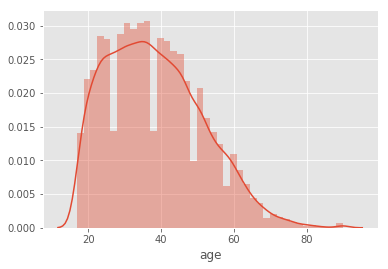

In [137]:
sns.distplot(census_df['age'], bins=40)

- we can see here that the distributiom is skewed to the left, lets see a box plot to gain more information

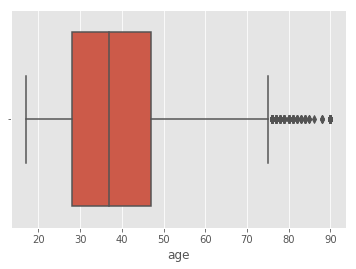

In [138]:
sns.boxplot(census_df['age'])

 - we can see that the median age is roughly 37, with an IQR of 28-47
 - the distribution ranges from 17 to 75 with several outliers ranging from 75-92
 - lets see if age has anything to do with high income!

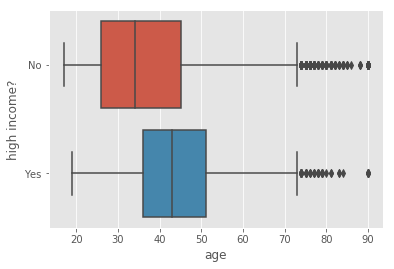

In [139]:
sns.boxplot(x="age", y ="high income?", data=census_df)
plt.show()

 - we can see that high earners on average are older
 - the median of high earners in 43 with an IQR of 36 - 52
 - low earners have a median age of 35 with an IQR of 25-42
 - suggesting that high earners are older
 - lets see if sex is a factor

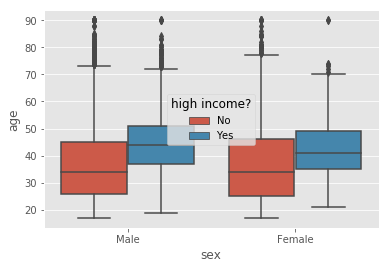

In [140]:
sns.boxplot(x="sex", y="age", hue="high income?", data=census_df)
plt.show()

 - we can see here that the distribution of high earners has little to nothing to do with sex really. 
 - both sexes that are high earners tend to be older, however, male high earners on average are slightly older with the median for male being 46 and female 42

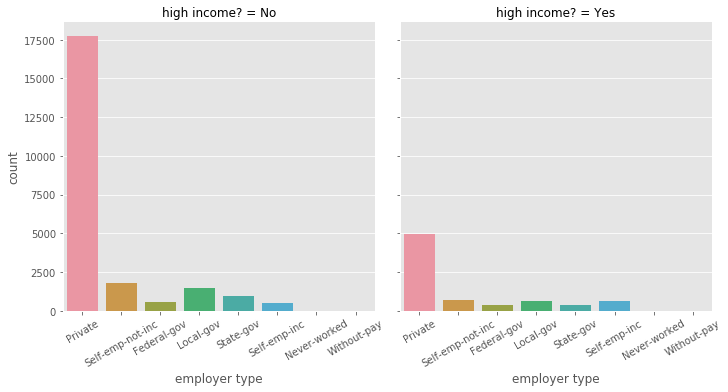

In [141]:
g = sns.catplot(x="employer type", col="high income?", data=census_df, kind="count")
g.set_xticklabels(rotation=30)

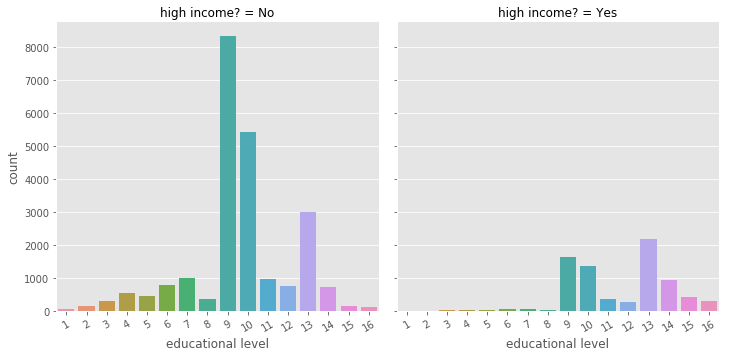

In [142]:
g = sns.catplot(x="educational level", col="high income?", data=census_df, kind='count')
g.set_xticklabels(rotation=30)

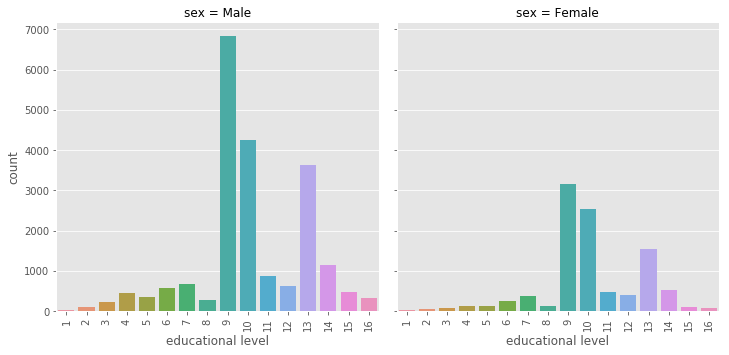

In [143]:
g = sns.catplot(x="educational level", col="sex", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

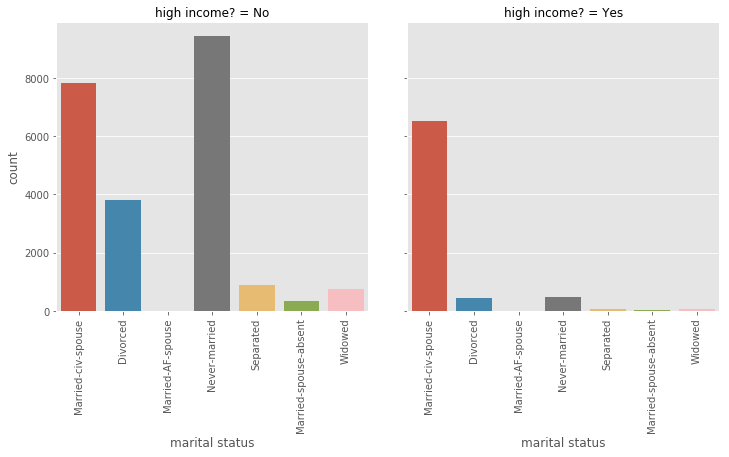

In [144]:
g = sns.catplot(x="marital status", col="high income?", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

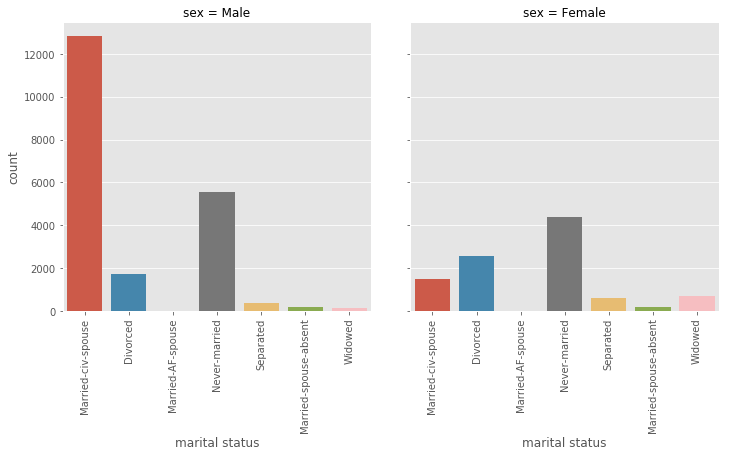

In [145]:
g = sns.catplot(x="marital status", col="sex", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

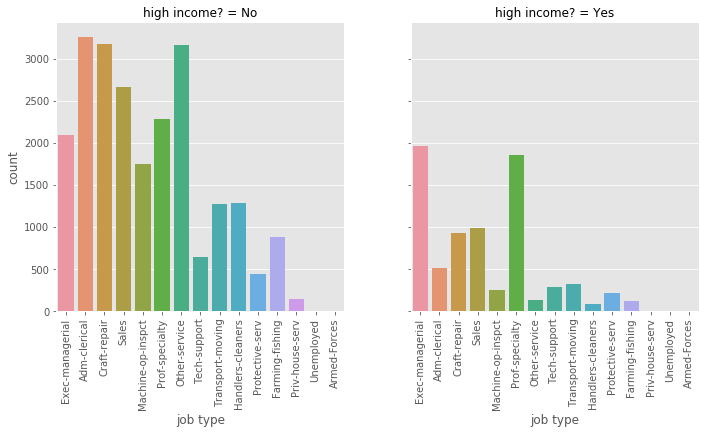

In [146]:
g = sns.catplot(x="job type", col="high income?", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

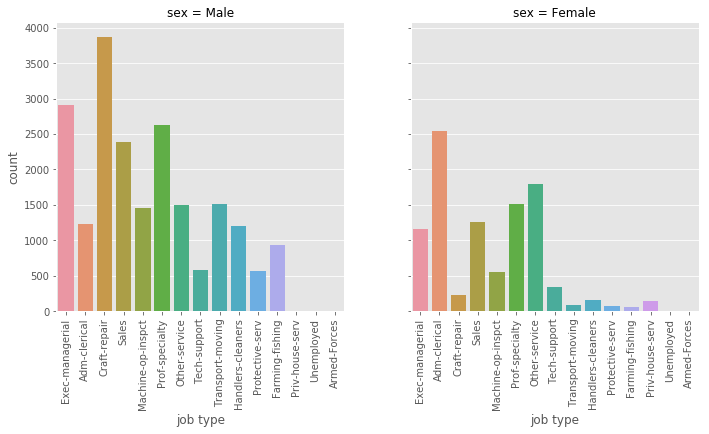

In [147]:
g = sns.catplot(x="job type", col="sex", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

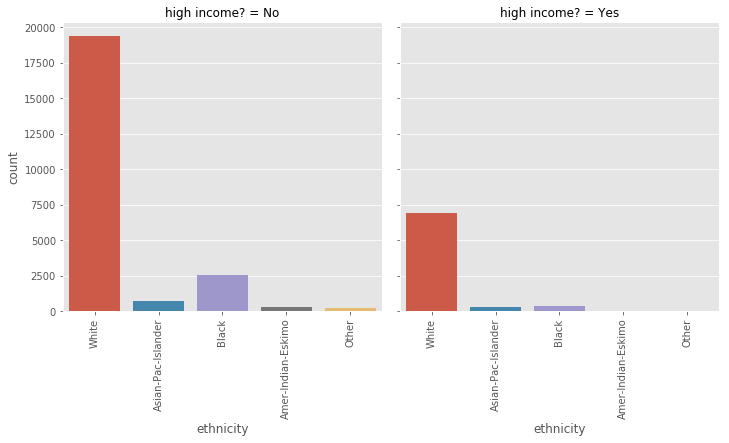

In [148]:
g = sns.catplot(x="ethnicity", col="high income?", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

In [149]:
census_df['capital gains'].describe()

count    30725.000000
mean      1105.785094
std       7497.027762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital gains, dtype: float64

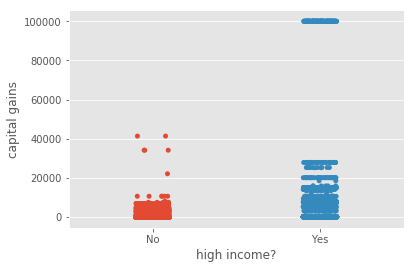

In [150]:
sns.stripplot(x="high income?", y="capital gains", data=census_df)

In [151]:
census_df['capital losses'].describe()

count    30725.000000
mean        88.889959
std        405.613208
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital losses, dtype: float64

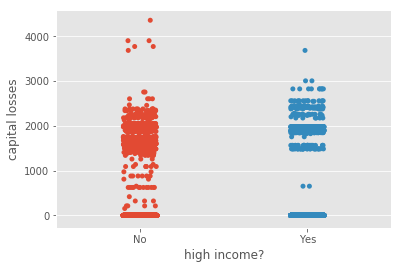

In [152]:
sns.stripplot(x="high income?", y="capital losses", data=census_df)

In [153]:
census_df['hours worked per week'].describe()

count    30725.000000
mean        40.946461
std         11.987385
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours worked per week, dtype: float64

/home/danny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


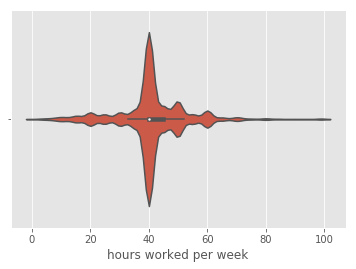

In [154]:
sns.violinplot(x="hours worked per week", data=census_df)

/home/danny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


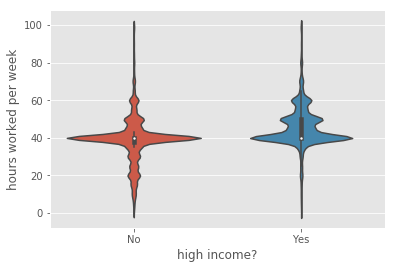

In [155]:
sns.violinplot(x="high income?", y="hours worked per week", data=census_df)

/home/danny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


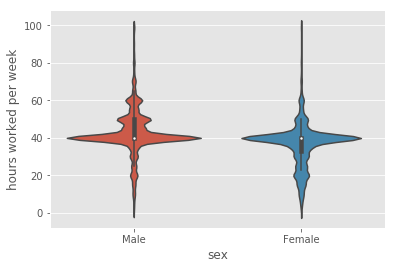

In [156]:
g = sns.violinplot(x="sex", y="hours worked per week", data=census_df)

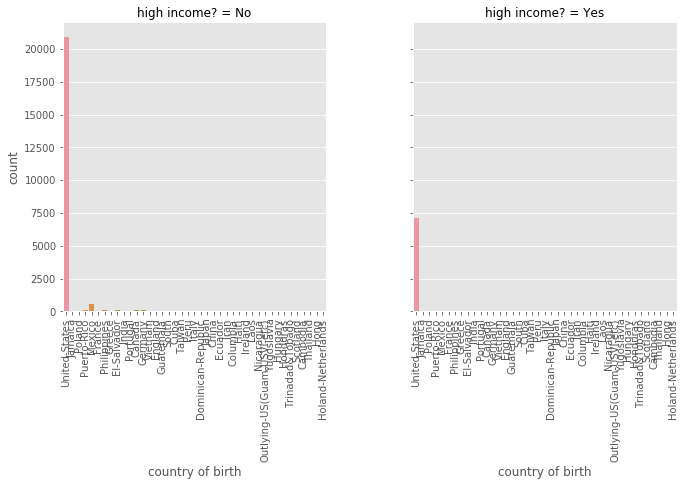

In [157]:
g = sns.catplot(x="country of birth", col="high income?", data=census_df, kind="count")
g.set_xticklabels(rotation=90)

- Now we have explored the dataset we can begin the feature engineering
- I will begin with marriage status
    - we need to reduce the amount of categories as its quite noisy. First we need to extract out armed forces married and civ married - there is a big difference but we can show this in a new variable called armed forces which will be boolean. 
    - we can then combined both to just married. we can reduce the other categories to was married (divoced, widowed) and Single
    - In order to make these values significant to the data mining algos we need to map numerical values to the different categories

In [158]:
ms = census_df['marital status']
af = "Married-AF-spouse"

census_df['Armed Forces Family'] = np.where (ms == af, 1, 0)

In [159]:
census_df['marital status'] = census_df['marital status'].replace(['Married-civ-spouse',
                                                                   'Married-AF-spouse', 'Married-spouse-absent'], 0)

In [160]:
census_df['marital status'] = census_df['marital status'].replace(['Divorced',
                                                                   'Separated', 'Widowed'], 1)

In [161]:
census_df['marital status'] = census_df['marital status'].replace(['Never-married'], 2)

In [162]:
census_df['marital status'] = census_df['marital status'].astype(int)

- Now we have sorted out marital status we can do the same for sex

In [163]:
census_df['sex'] = census_df['sex'].map({"Male": 1, "Female":0})

- and high income!

In [164]:
census_df['high income?'] = census_df['high income?'].map({"Yes": 1, "No":0})

In [165]:
census_df['ethnicity'] = census_df['ethnicity'].replace(['Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo',
       'Other'], 1)
census_df['ethnicity'] = census_df['ethnicity'].replace(['White'], 0)

In [166]:
census_df['country of birth'] = (census_df['country of birth'] == 'United-States').astype(int)

In [167]:
census_df['hours worked per week'] = census_df['hours worked per week']//10

In [168]:

census_df['employer type'] = census_df['employer type'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Govt')

In [169]:
census_df['employer type'] = census_df['employer type'].map({"Private": 0, "Self-emp-inc":1,"Self-emp-not-inc":2,  "Govt":3, "Never-worked":4, "Without-pay":5})

In [170]:
census_df['job type'] = census_df['job type'].map({"Exec-managerial": 0, "Adm-clerical":1, "Craft-repair":2, "Sales":3, "Machine-op-inspct":4, "Prof-specialty": 5, "Other-service":6, "Tech-support":7, "Transport-moving":8, "Handlers-cleaners":9, "Protective-serv": 10, "Farming-fishing":11, "Priv-house-serv":12,"Unemployed":13, "Armed-Forces":13})

In [171]:
#census_df['educational level'] = census_df['educational level'].replace([1,2,3,4], 1)
#census_df['educational level'] = census_df['educational level'].replace([5,6,7,8,9], 2)
#census_df['educational level'] = census_df['educational level'].replace([10,11,12,13], 3)
#census_df['educational level'] = census_df['educational level'].replace([14,15,16], 4)

In [172]:
census_df = census_df[['age', 'employer type', 'educational level', 'marital status',
                       'job type', 'ethnicity', 'sex',
                       'capital gains', 'capital losses', 'hours worked per week',
                       'country of birth', 'Armed Forces Family', 'high income?']]

In [173]:
census_df

,age,employer type,educational level,marital status,job type,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,Armed Forces Family,high income?
0,56,0,14,0,0,0,1,0,0,4,1,0,0
1,46,0,11,1,1,0,0,0,0,4,1,0,0
3,37,0,9,0,2,0,1,0,0,4,1,0,0
4,52,2,10,0,3,0,1,0,0,5,1,0,1
5,25,0,7,0,4,0,1,0,0,4,1,0,0
6,63,0,13,0,5,0,1,0,0,5,1,0,1
7,27,0,9,0,2,0,1,0,0,4,1,1,1
8,33,0,10,0,5,0,1,0,0,4,1,0,0
9,33,0,7,0,6,0,1,0,0,4,1,0,0
10,45,3,10,0,5,0,1,0,0,5,1,0,1


In [174]:
X = array(census_df.iloc[:, 0:12])
Y = array(census_df['high income?'])

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, shuffle=True)


In [176]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(15362, 12)
(7682, 12)
(7681, 12)
(15362,)
(7682,)
(7681,)


## KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [178]:
valid = knn.predict(X_valid)
print('Prediction {}'.format(valid))

Prediction [1 0 0 ... 0 0 0]


In [179]:
knn.score(X_valid, y_valid)

0.8333550318968884

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, valid))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      5720
          1       0.69      0.64      0.66      1961

avg / total       0.83      0.83      0.83      7681



In [181]:
prediction = knn.predict(X_test)
print('Prediction {}'.format(prediction))

Prediction [1 0 0 ... 0 0 0]


In [182]:
knn.score(X_test, y_test)

0.8342879458474356

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      5798
          1       0.68      0.62      0.65      1884

avg / total       0.83      0.83      0.83      7682



## SVM

In [184]:
from sklearn import svm
svmCenrbf = svm.SVC(kernel='rbf')
svmCenrbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
valid = svmCenrbf.predict(X_valid)
print('Prediction {}'.format(valid))

Prediction [0 0 0 ... 0 0 0]


In [186]:
svmCenrbf.score(X_valid, y_valid)

0.844030725165994

In [187]:
print(classification_report(y_valid, valid))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90      5720
          1       0.79      0.53      0.63      1961

avg / total       0.84      0.84      0.83      7681



In [188]:
prediction = svmCenrbf.predict(X_test)
print('Prediction {}'.format(prediction))

Prediction [0 0 0 ... 0 0 0]


In [189]:
svmCenrbf.score(X_test, y_test)

0.8506899244988284

In [190]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      5798
          1       0.81      0.51      0.62      1884

avg / total       0.85      0.85      0.84      7682



## Naive Bayes

In [191]:
from sklearn.naive_bayes import GaussianNB
nbCen = GaussianNB()
nbCen.fit(X_train, y_train)

GaussianNB(priors=None)

In [192]:
valid = nbCen.predict(X_valid)
print('Prediction {}'.format(valid))

Prediction [0 0 0 ... 0 0 0]


In [193]:
nbCen.score(X_valid, y_valid)

0.7884390053378466

In [194]:
print(classification_report(y_valid, valid))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      5720
          1       0.69      0.31      0.43      1961

avg / total       0.77      0.79      0.76      7681



In [195]:
prediction = nbCen.predict(X_test)
print('Prediction {}'.format(prediction))

Prediction [0 0 0 ... 0 0 0]


In [196]:
nbCen.score(X_test, y_test)

0.7913303827128352

In [197]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.81      0.95      0.87      5798
          1       0.67      0.30      0.41      1884

avg / total       0.77      0.79      0.76      7682



## Tuning SVM

In [92]:
#range of values for c and gamma to see which scores best
C_values = [0.001, 0.01, 0.1, 1, 10]  
gamma_values = [0.001, 0.01, 0.1, 1, 10]
#init variables to store best score and params
best_score = 0  
best_params = {'C': None, 'gamma': None}
#nested for loop going through both lists of values
for C in C_values:  
    for gamma in gamma_values:
        #using the values in list fit svm to data
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        #store the acc score in variable
        score = svc.score(X_valid, y_valid)
        #if statement to check if score is the best
        if score > best_score:
            #if so, store best score + params in variables
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params 

(0.8591329254003385, {'C': 10, 'gamma': 0.01})

- Now we use the optimal params to mine the data using svm

In [93]:
svmOpt = svm.SVC(kernel='rbf', C=10, gamma = 0.01)
svmOpt.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
valid = svmOpt.predict(X_valid)
print('Prediction {}'.format(valid))

Prediction [0 0 1 ... 1 0 1]


In [95]:
svmOpt.score(X_valid, y_valid)

0.8591329254003385

In [96]:
print(classification_report(y_valid, valid))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91      5798
          1       0.82      0.55      0.66      1883

avg / total       0.86      0.86      0.85      7681



In [97]:
svmOpt.score(X_test, y_test)

0.8607133558969019

In [98]:
print(classification_report(y_valid, valid))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91      5798
          1       0.82      0.55      0.66      1883

avg / total       0.86      0.86      0.85      7681

